# Equitabilidad entre relaciones 

En este notebook revisaremos la equitabilidad entre las medidas de correlacion definidas en la memoria. Para esto primero definiremos las relaciones a probar y luego las evaluaremos los métodos. 

## Definiendo las relaciones 

Primero definiemos una funcion que nos entrega una relacion ruidosa basada en 
$$ (x+\epsilon, f(x)+\epsilon )$$

In [1]:
import numpy as np

def generate_relationship(x, relation_func, noise_level, x_min = 0, x_max = 1, normalize=False):

    n = len(x)

    result_matrix = np.zeros([2, n])


    y = relation_func(x) 

    y_noise = y + np.random.normal(0, noise_level, n)
    if normalize:
        y_noise = (y_noise-np.min(y_noise))/(np.max(y_noise)- np.min(y_noise))

    x_noise = x # + np.random.normal(0, noise_level, n)

    result_matrix[0] = x_noise
    result_matrix[1] = y_noise

    return result_matrix


    

In [2]:
m = generate_relationship(np.linspace(0,1,1000), lambda x : np.sin(x*20), 0.003)

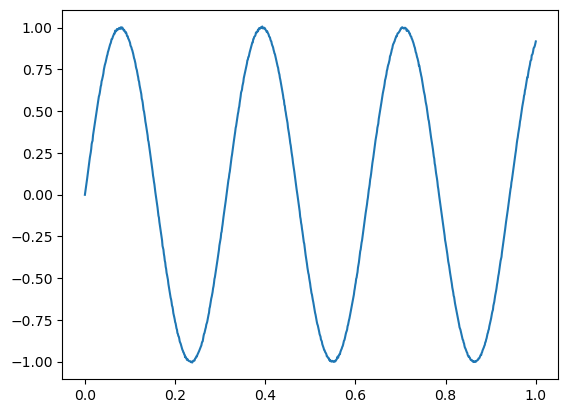

In [3]:
import matplotlib.pyplot as plt

plt.plot(m[0],m[1])
plt.show()


# Definimos todas las funciones que vamos a usar

In [4]:
def cos_hf(x):
    return np.cos(x*np.pi*14)

def cos_lf(x):
    return np.cos(x*np.pi*7)

def cos_vf(x):
    return np.cos(x*np.pi*5*(1+x))

def cubic(x):
    return 4*x**3-x**2+4*x

def cubic_y_strech(x):
    return 41*(4*x**3-x**2+4*x)

def exponential(x):
    return np.exp2(x)

def line(x):
    return x

def linear_periodic_hf(x):
    return 0.1*np.sin(10.6*(2*x-1))+1.1*(2*x-1)

def linear_periodic_lf(x):
    return 0.2*np.sin(4*(2*x-1))+1.1*(2*x-1)

def linear_periodic_mf(x):
    return np.sin(10*np.pi*x)+x

def parabola(x):
    return 4*x**2

def sine_hf(x):
    return np.sin(16*np.pi*x)

def sine_lf(x):
    return np.sin(8*np.pi*x)

def sine_vf(x):
    return np.sin(6*np.pi*x*(1*x))


function_list = [cos_hf, cos_lf, cos_vf , cubic, cubic_y_strech, exponential, line, linear_periodic_hf, linear_periodic_lf, linear_periodic_mf, parabola, sine_hf, sine_lf, sine_vf]

func_name_list = ['Coseno Alta Frec.', 'Coseno Baja Frec.', 'Coseno Frec. Variable', 'Cúbica', 'Cúbica estirada en y', 'Exponencial', 'Lineal', 'Lineal Periodica Alta Frec.', 'Lineal + Periodica + Baja Frec.', 'Lineal + Periodica Media Frec.', 'Parábola', 'Seno Alta Frec.', 'Seno Baja Frec.', 'Seno Frec. Variable']



El r2 de Coseno Alta Frec. es: 0.622527254079198


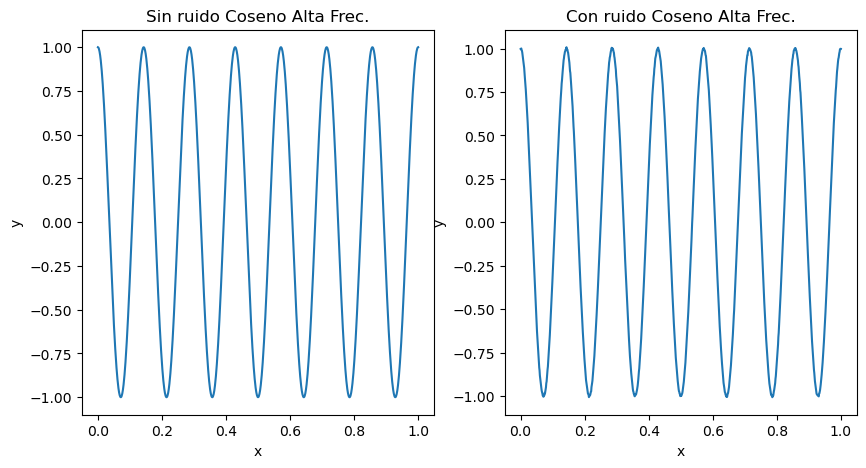

El r2 de Coseno Baja Frec. es: 0.9726110850478109


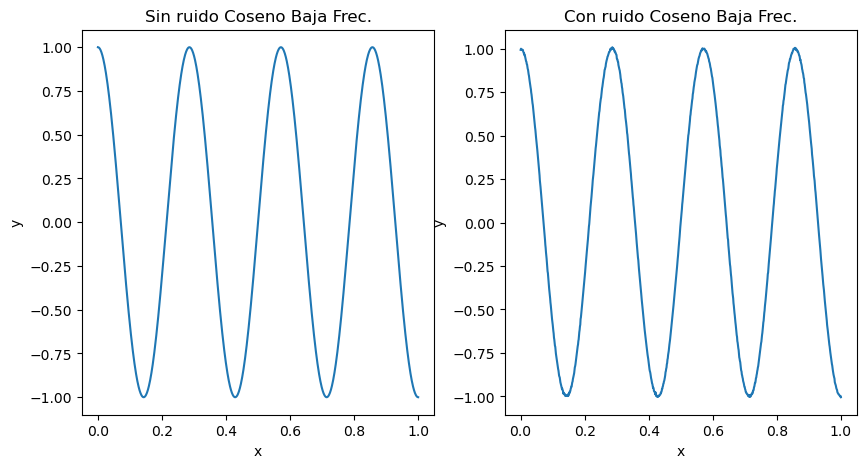

El r2 de Coseno Frec. Variable es: -0.3438161486382934


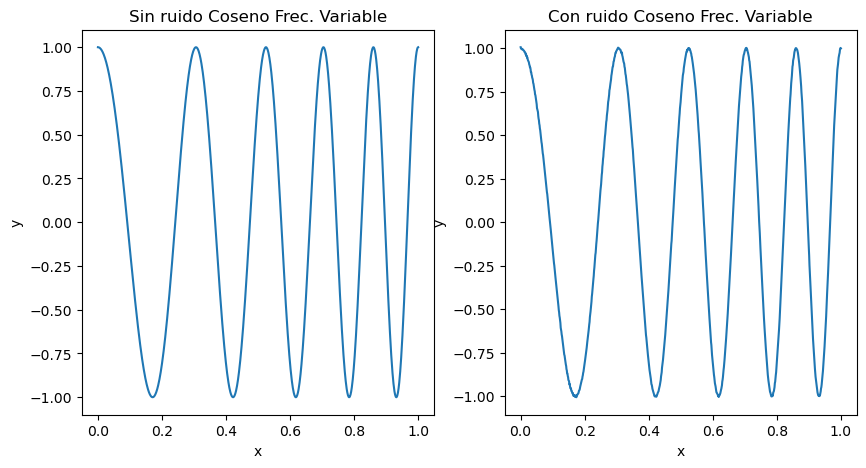

El r2 de Cúbica es: 0.991133689169418


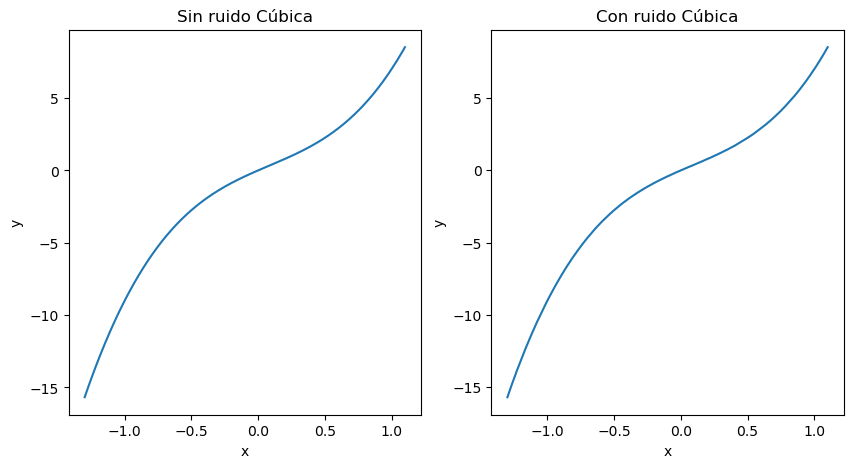

El r2 de Cúbica estirada en y es: 0.9999977917676912


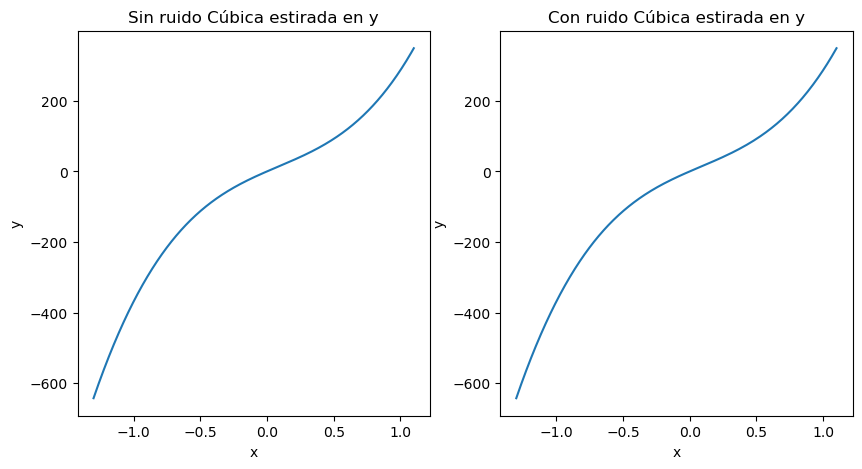

El r2 de Exponencial es: 0.9999965184141952


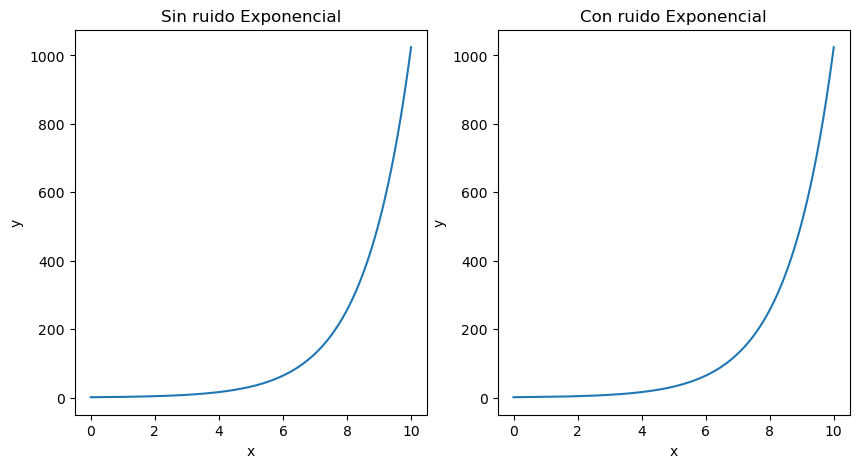

El r2 de Lineal es: 0.0


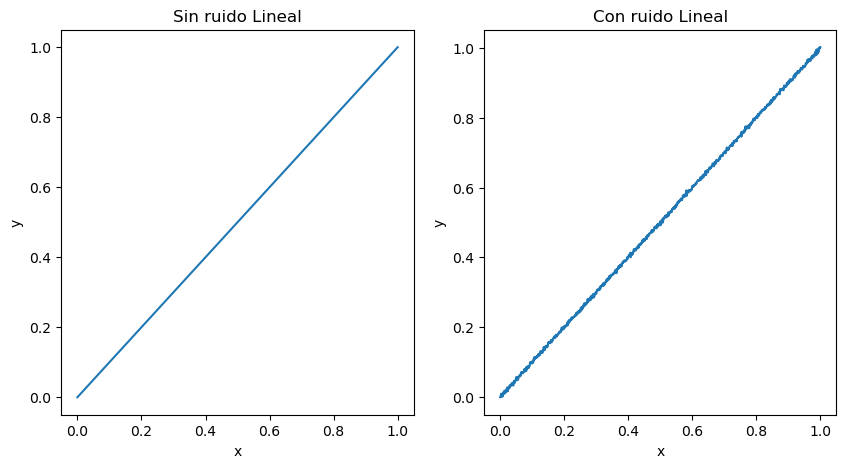

El r2 de Lineal Periodica Alta Frec. es: 0.9509020167313752


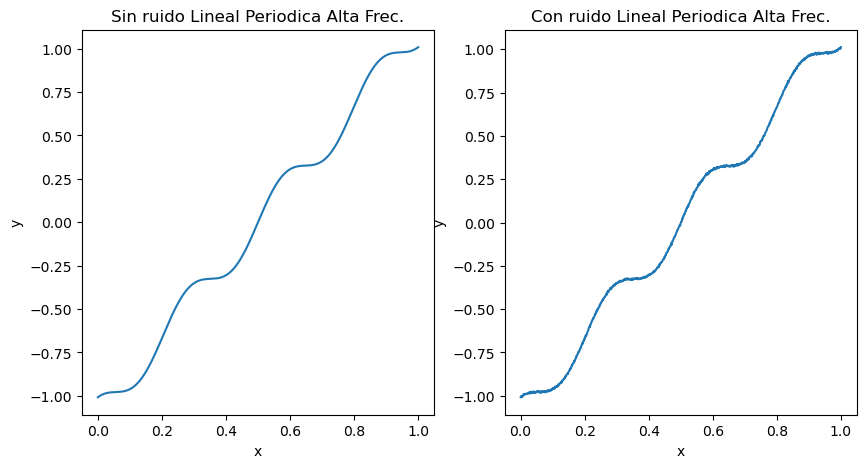

El r2 de Lineal + Periodica + Baja Frec. es: 0.9524257061872079


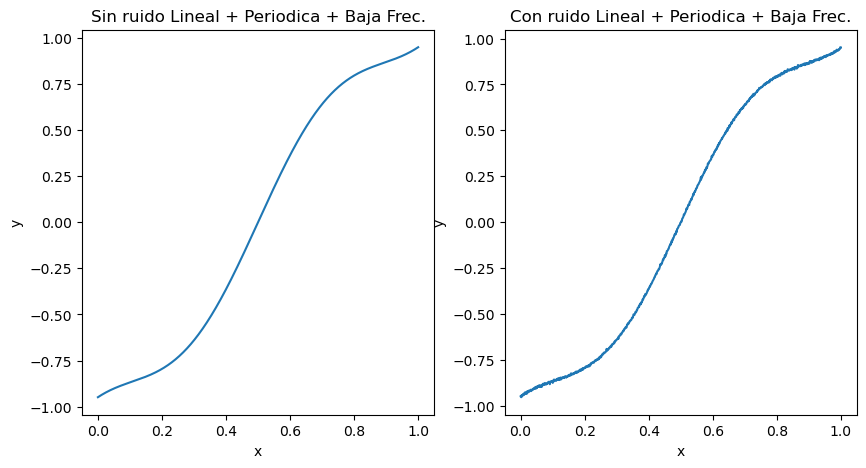

El r2 de Lineal + Periodica Media Frec. es: -2.2125742474712224e+21


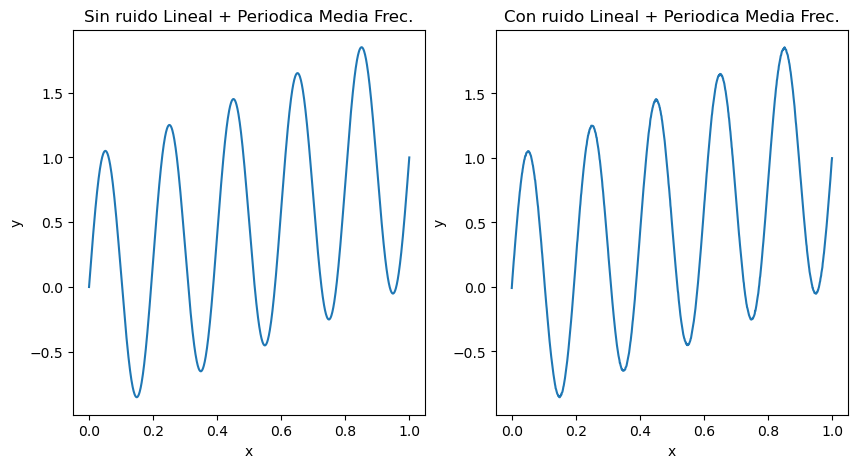

El r2 de Parábola es: 0.1835908661996487


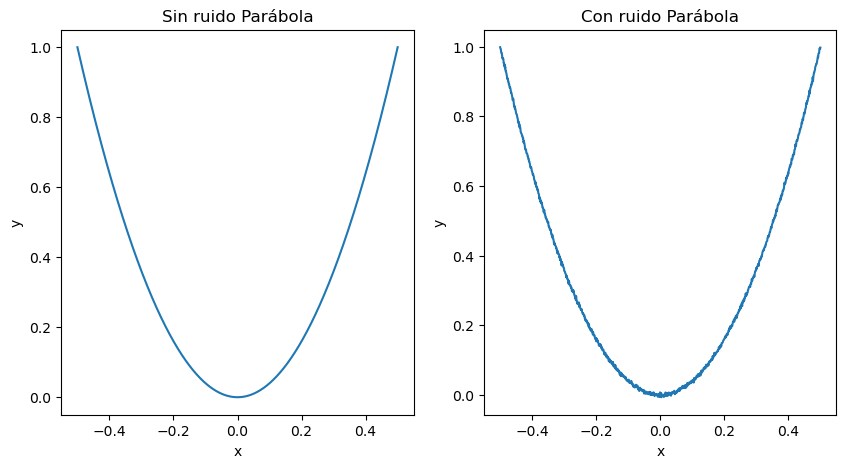

El r2 de Seno Alta Frec. es: 0.08739626088663727


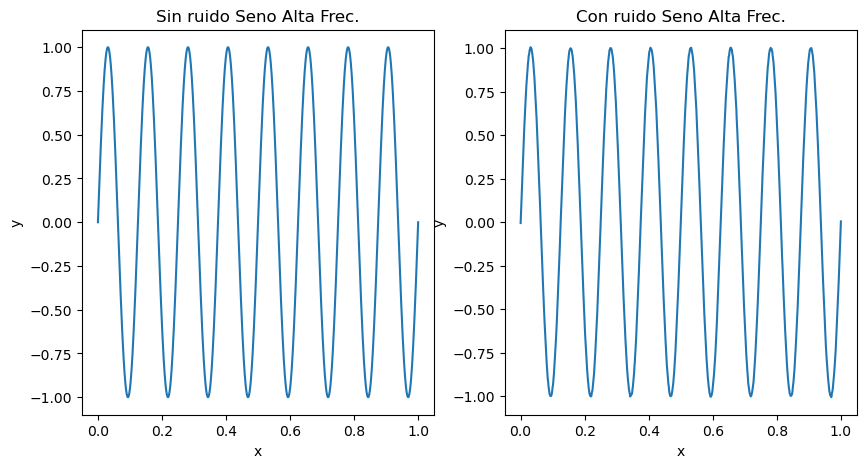

El r2 de Seno Baja Frec. es: 0.9784981205887765


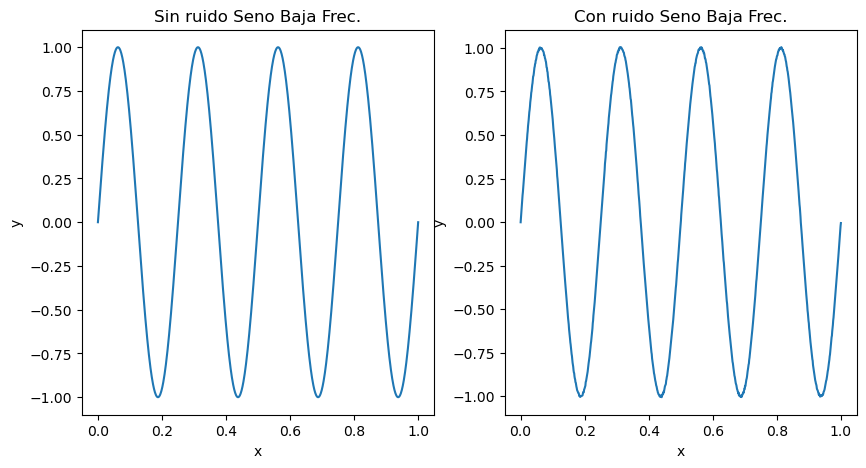

El r2 de Seno Frec. Variable es: -19.041185044448266


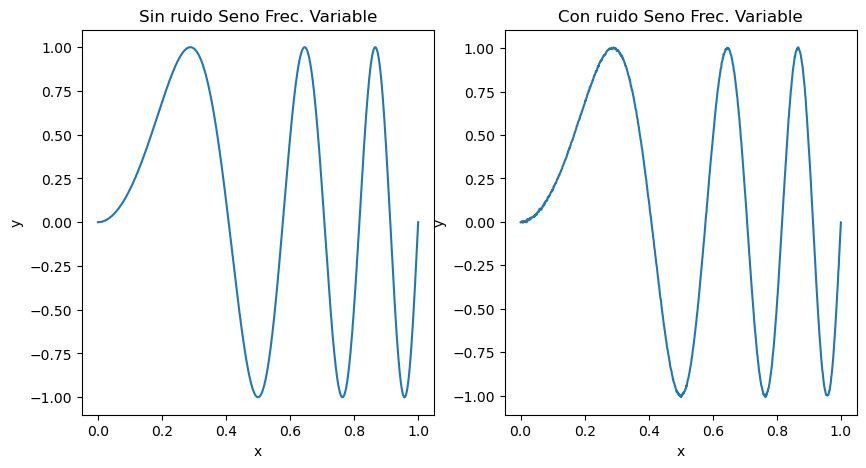

In [5]:
for func, name in zip(function_list, func_name_list):

    if name == 'Cúbica' or name == 'Cúbica estirada en y':
        x = np.linspace(-1.3,1.1,1000)
    elif name == 'Exponencial':
        x = np.linspace(0,10,1000)
    elif name == 'Parábola':
        x = np.linspace(-0.5,0.5,1000)
    else:
        x = np.linspace(0,1,1000)
     
    normal_rel = generate_relationship(x, func,0, normalize=False)
    noisy_rel = generate_relationship(x, func,0.003, normalize=False)
    # multiplot m[0] vs m[1] and m[2]

    # calculate r2 between normal_rel and noisy_rel

    from sklearn.metrics import r2_score

    r2 = r2_score(normal_rel, noisy_rel)
    print(f'El r2 de {name} es: {r2}')

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].plot(normal_rel[0],normal_rel[1])
    axes[0].set_title(f'Sin ruido {name}')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')

    axes[1].plot(noisy_rel[0],noisy_rel[1])
    axes[1].set_title(f'Con ruido {name}')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')

    plt.show()




# Encontrar $\theta$'s para que R2 sea equidistante  

Como se mencioná en el trabajo de reshef, se buscan niveles de ruido 

In [6]:


def find_noise_values(x, func, n_noises = 50):

    noise_values = np.zeros(n_noises)
    r2_values = np.linspace(0,1,n_noises)
    # reverse r2_values
    r2_values = r2_values[::-1]
    i = 0
    theta = 0

    error = 0.0001
    normal_rel = generate_relationship(x, func, 0, normalize=False)

    while noise_values[-1] == 0:

        noisy_rel = generate_relationship(x, func, theta, normalize=False)
        r2 = r2_score(normal_rel, noisy_rel)

        if r2 <= r2_values[i]:
            if np.abs(r2_values[i]-r2) > 0.005 or r2<-0.1:
                theta = old_theta
                error = error/1.2
                continue

            old_theta = theta
            noise_values[i] = theta
            # print(f"Encontrado para {r2_values[i]} r2 {r2}, error {r2_values[i]-r2}, {i}")
            i += 1
            error = 0.00001

        theta += error

    return noise_values

In [14]:
noise_vals = np.zeros(51)
for i in range(10):
    noise_vals += find_noise_values(np.linspace(0,1,1000), lambda x : 4*x**2, n_noises = 51)

noise_vals = noise_vals/10

In [15]:
noise_vals

array([0.        , 0.0004286 , 0.00055166, 0.00068049, 0.00076876,
       0.00086807, 0.00102437, 0.00108479, 0.00113806, 0.0011755 ,
       0.00124538, 0.00126259, 0.00132132, 0.00133593, 0.00135148,
       0.00144296, 0.0014696 , 0.00149357, 0.00152093, 0.00158858,
       0.00165838, 0.00170001, 0.00170577, 0.00174484, 0.00177387,
       0.00178523, 0.00181139, 0.00186362, 0.00189243, 0.00190095,
       0.00191069, 0.00192774, 0.00193337, 0.00195471, 0.00198365,
       0.00199832, 0.00207036, 0.00210547, 0.00213382, 0.00214418,
       0.00217174, 0.00218451, 0.00220203, 0.00221942, 0.00227137,
       0.00228434, 0.00230502, 0.00233017, 0.00236312, 0.0023747 ,
       0.00242235])

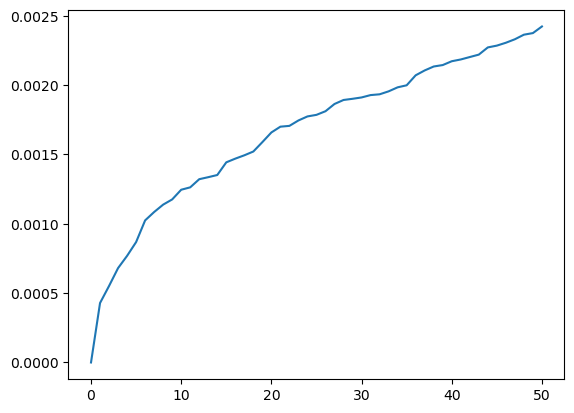

In [16]:
plt.plot(noise_vals)

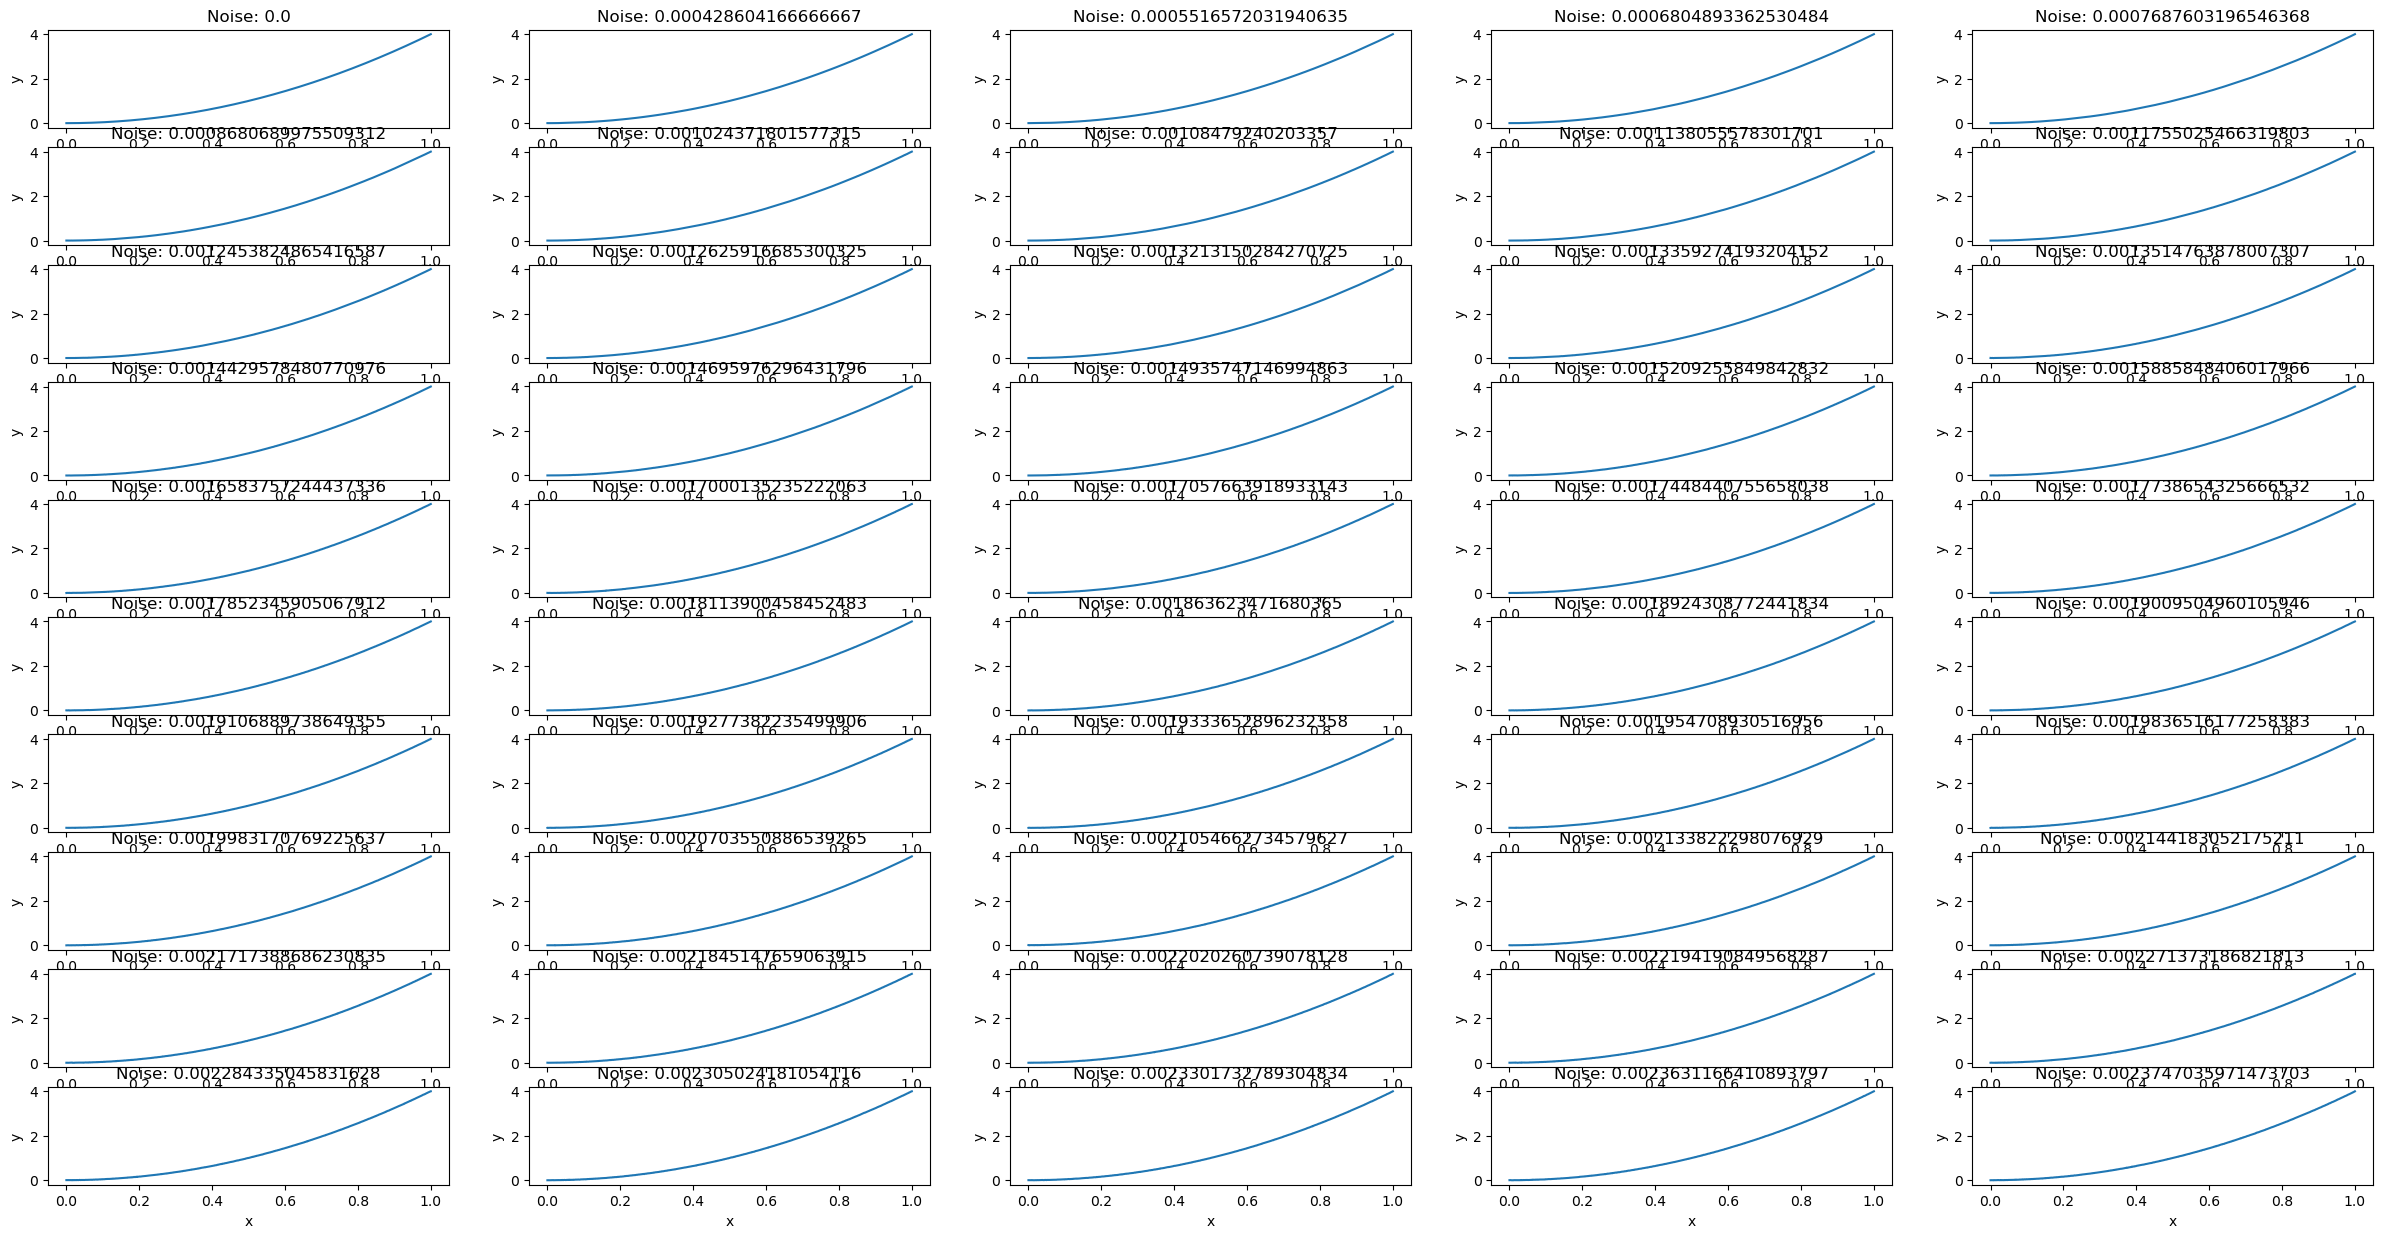

In [17]:
fig, ax = plt.subplots(10, 5, figsize=(30, 15))
for i, noise in enumerate(noise_vals):
    if i == 50:
        break
    m = generate_relationship(np.linspace(0,1,1000), lambda x : 4*x**2, noise)
    ax[i//5, i%5].plot(m[0],m[1])
    ax[i//5, i%5].set_title(f'Noise: {noise}')
    ax[i//5, i%5].set_xlabel('x')
    ax[i//5, i%5].set_ylabel('y')
plt.show()
    

El r2 de Coseno Alta Frec. es: -3.323485446308932


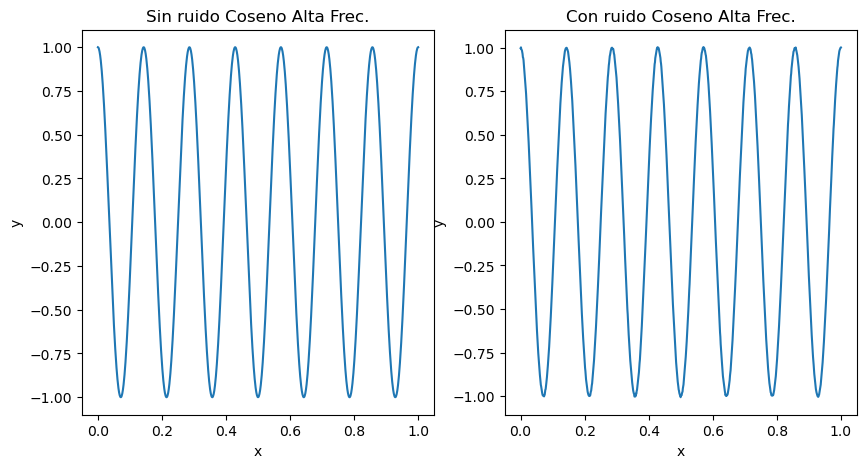

El r2 de Coseno Baja Frec. es: 0.9827679164334256


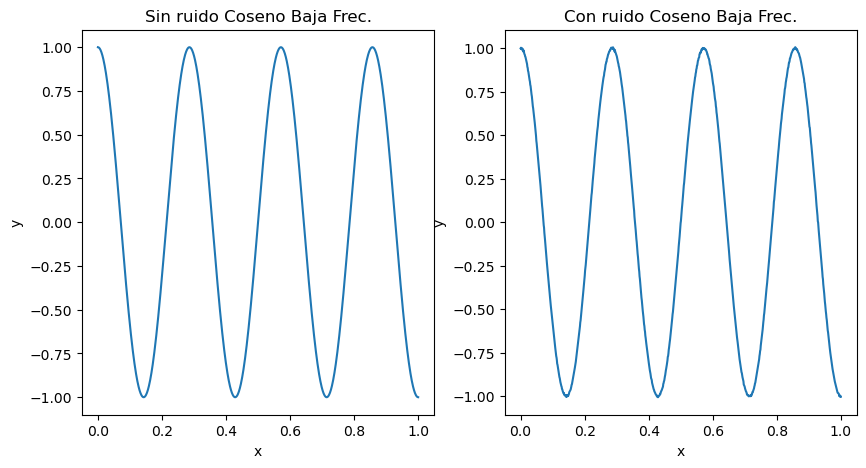

El r2 de Coseno Frec. Variable es: 0.9041939178735091


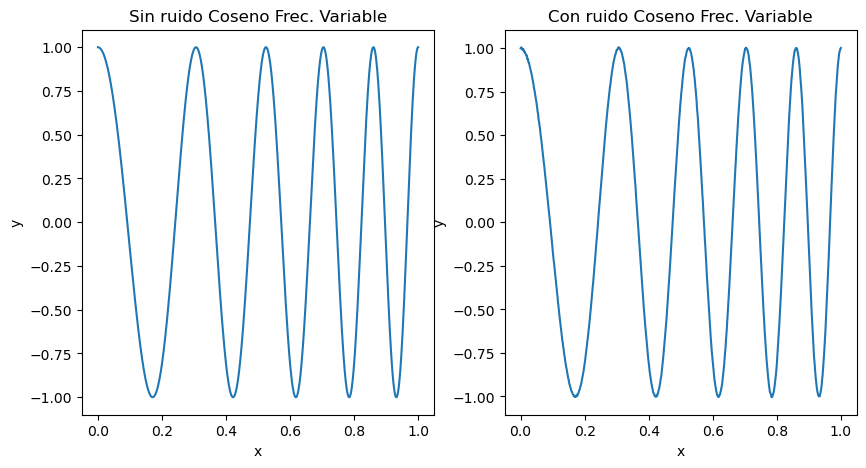

El r2 de Cúbica es: 0.9990943936253357


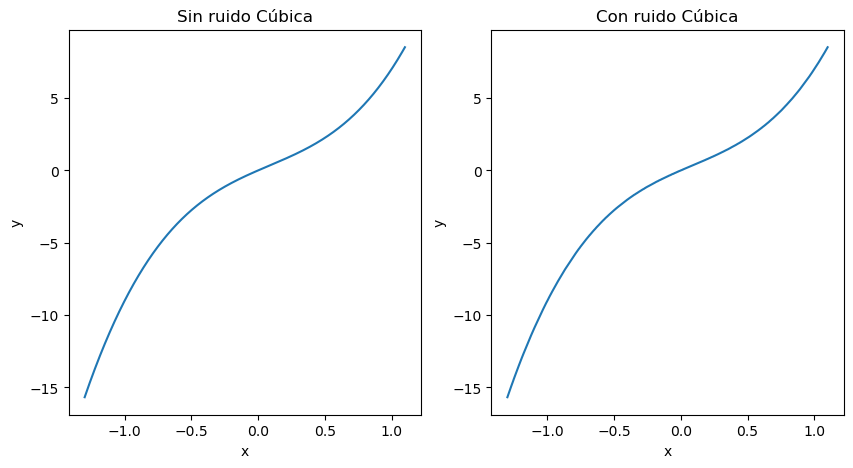

El r2 de Cúbica estirada en y es: 0.9999802809476376


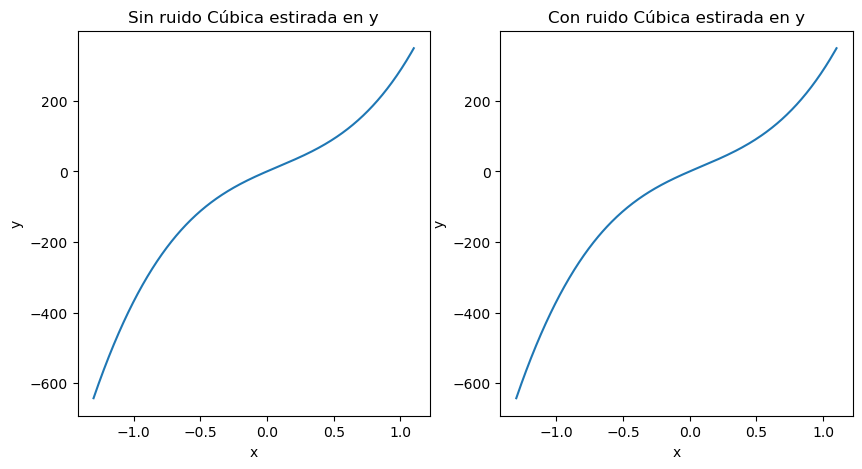

El r2 de Exponencial es: 0.9999976768192623


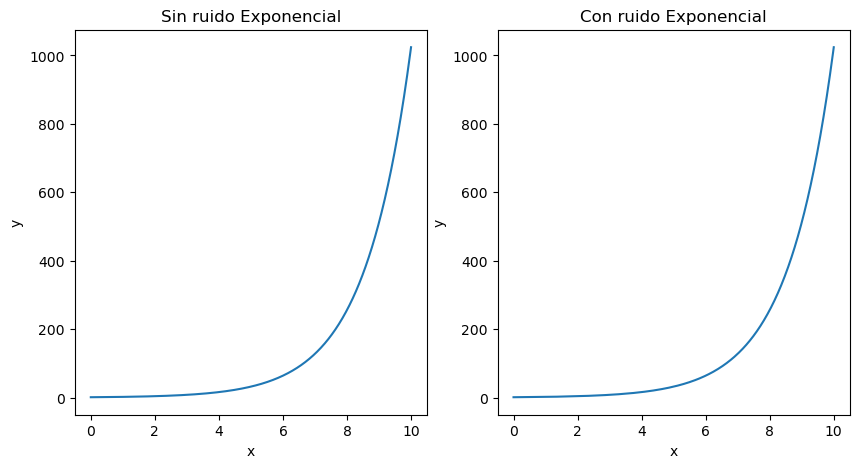

El r2 de Lineal es: 0.0


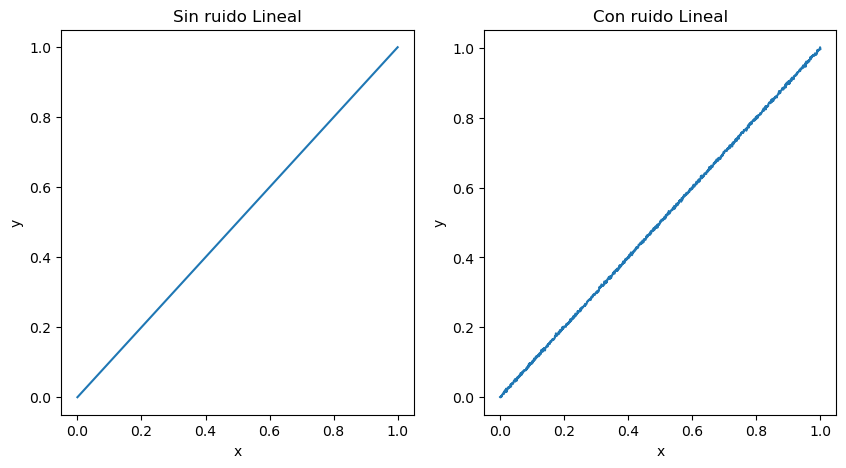

El r2 de Lineal Periodica Alta Frec. es: 0.9783707172539698


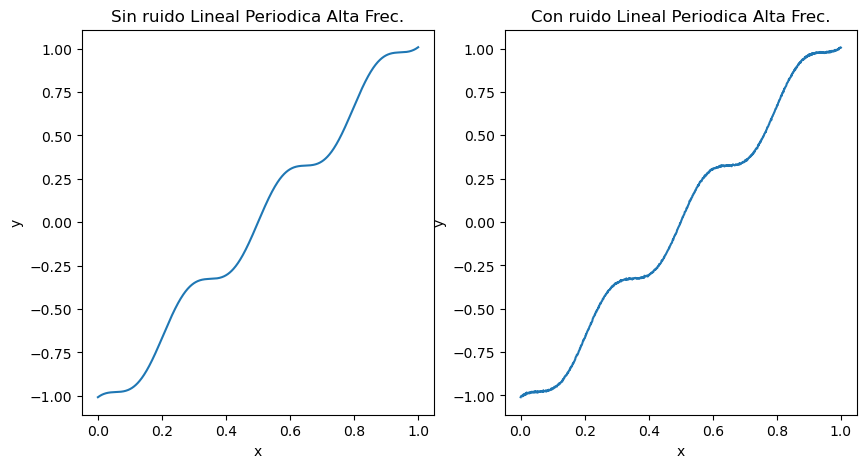

El r2 de Lineal + Periodica + Baja Frec. es: 0.969676877334874


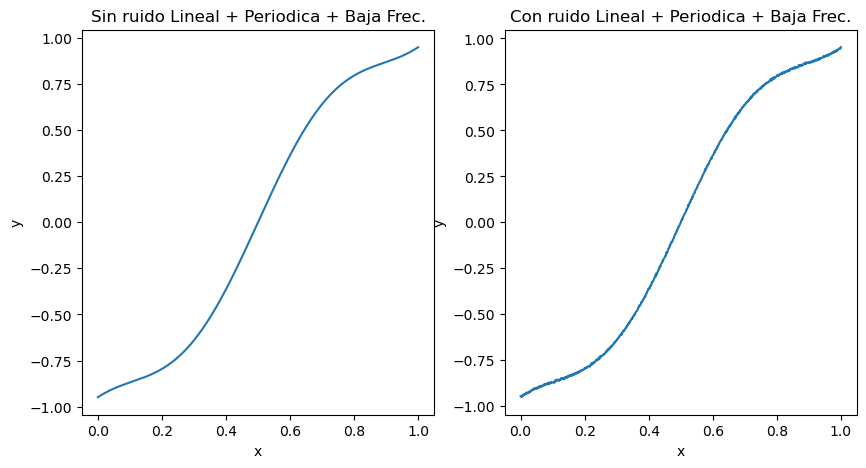

El r2 de Lineal + Periodica Media Frec. es: -6.965385715911028e+20


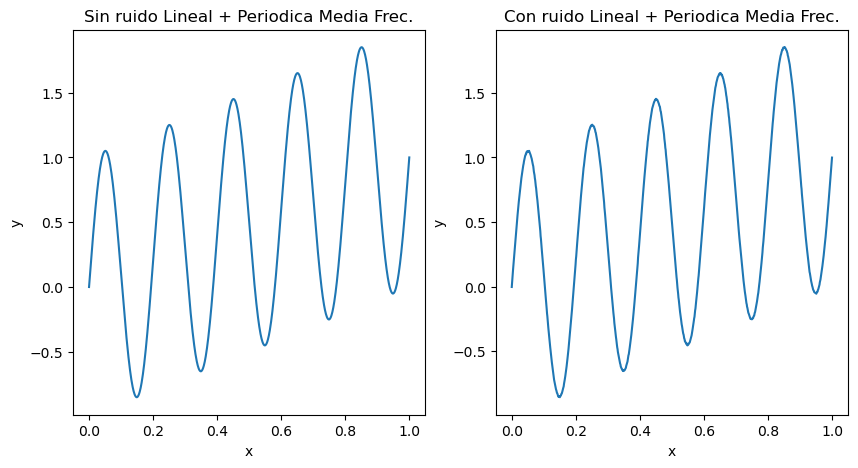

El r2 de Parábola es: 0.7348086111550877


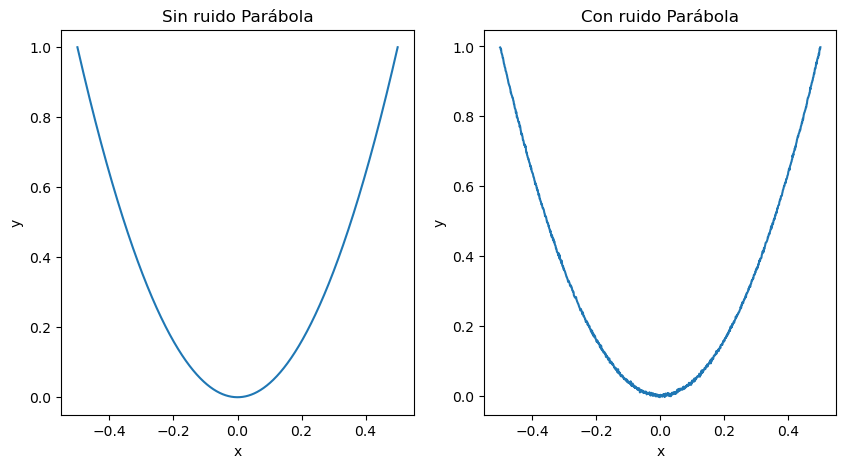

El r2 de Seno Alta Frec. es: 0.538756499396084


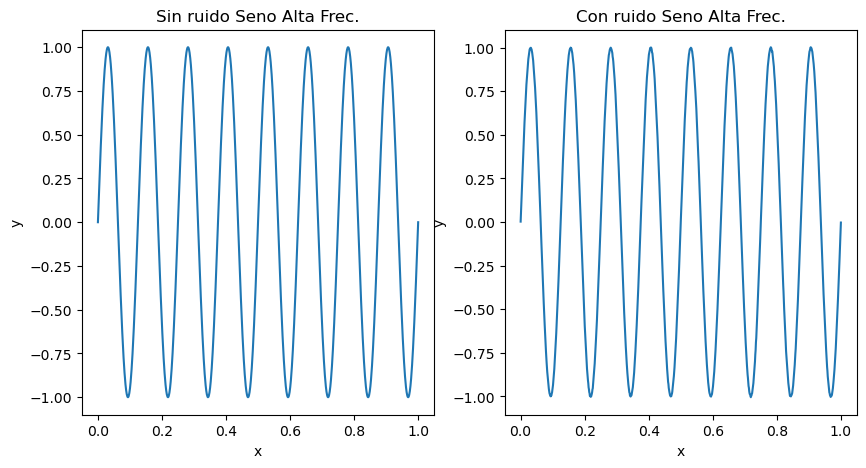

El r2 de Seno Baja Frec. es: 0.9785613029726388


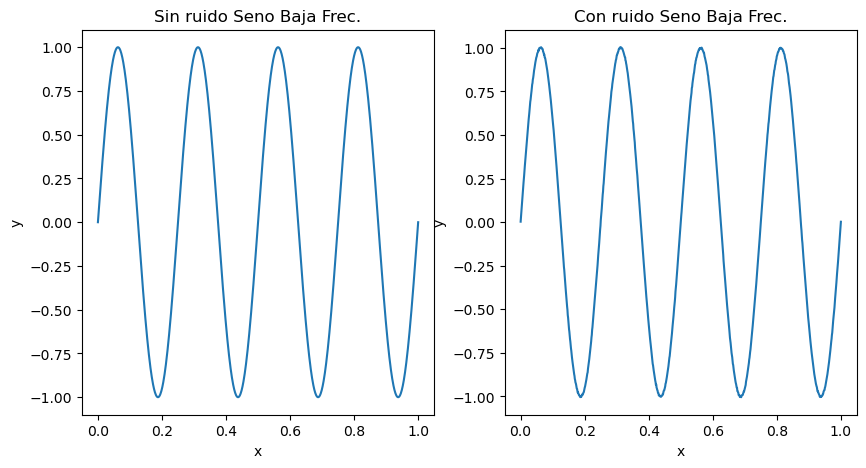

El r2 de Seno Frec. Variable es: -1.3456440976655895


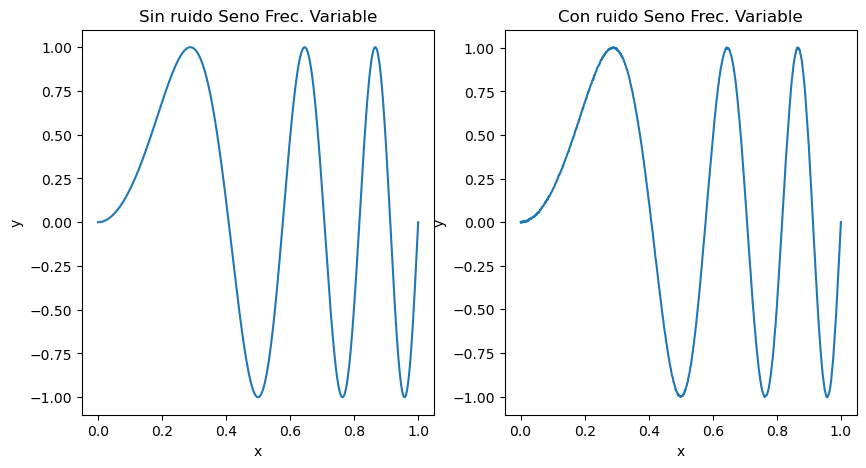

In [18]:
for func, name in zip(function_list, func_name_list):

    if name == 'Cúbica' or name == 'Cúbica estirada en y':
        x = np.linspace(-1.3,1.1,1000)
    elif name == 'Exponencial':
        x = np.linspace(0,10,1000)
    elif name == 'Parábola':
        x = np.linspace(-0.5,0.5,1000)
    else:
        x = np.linspace(0,1,1000)
     
    normal_rel = generate_relationship(x, func,0, normalize=False)
    noisy_rel = generate_relationship(x, func,0.0025, normalize=False)
    # multiplot m[0] vs m[1] and m[2]

    # calculate r2 between normal_rel and noisy_rel

    from sklearn.metrics import r2_score

    r2 = r2_score(normal_rel, noisy_rel)
    print(f'El r2 de {name} es: {r2}')

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].plot(normal_rel[0],normal_rel[1])
    axes[0].set_title(f'Sin ruido {name}')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')

    axes[1].plot(noisy_rel[0],noisy_rel[1])
    axes[1].set_title(f'Con ruido {name}')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')

    plt.show()





In [9]:
### m